In [37]:
from spellchecker import SpellChecker
import pandas as pd
import tqdm.auto
import matplotlib.pyplot as plt


def count_spelling_errors(text):
    """
    Count the number of spelling errors in a text.

    Parameters
    ----------
    text : str
        The text to be analyzed.
        
    Returns
    -------
    int
        The number of spelling errors in the text.
    """
    tokens = text.split()
    spell = SpellChecker()
    misspelled = spell.unknown(tokens)
    return len(misspelled)

In [31]:
file = open("data/stories.csv", "r")
stories_array = []
for line in file:
    stories_array.append(line)
file.close()

df = pd.DataFrame(stories_array, columns=['story'])

df['spell_errors'] = df['story'].progress_apply(count_spelling_errors)

100%|██████████| 3495/3495 [01:42<00:00, 33.96it/s]


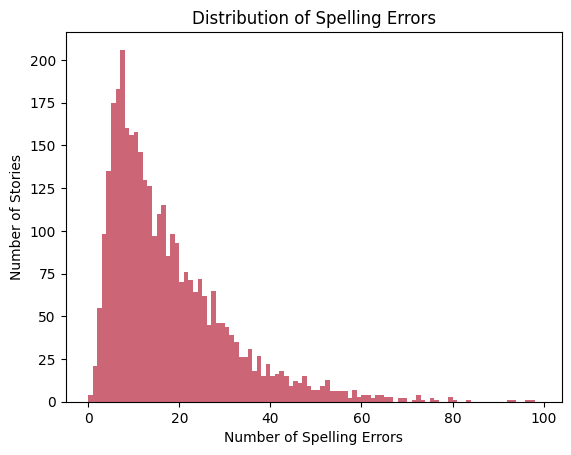

In [53]:
# Plot the distribution of spelling errors
plt.hist(df['spell_errors'], bins=range(0, 100, 1), color='#C67')
plt.title('Distribution of Spelling Errors')
plt.xlabel('Number of Spelling Errors')
plt.ylabel('Number of Stories')
plt.show()

In [54]:
df['spell_errors'].describe()

count    3495.000000
mean       17.473534
std        15.247503
min         0.000000
25%         7.000000
50%        13.000000
75%        23.000000
max       307.000000
Name: spell_errors, dtype: float64